These data were taken with the stage temperature regulating at about 1 K and the Hittite providing bias instead of the roach during the stream.

In [1]:
%matplotlib inline
plt.rcParams['figure.dpi'] = 300

In [2]:
from collections import defaultdict

In [3]:
from kid_readout.measurement.io import npy
from kid_readout.measurement import plot_basic
from kid_readout.analysis.resonator import lmfit_models, lmfit_resonator

In [4]:
npd = npy.NumpyDirectory('/data/detectors/2017-02-17_181315_hittite.npd/') 

In [5]:
npd.node_names()

['SingleSweep0', 'SingleSweepStream1', 'ADCSnap2']

In [6]:
swp = npd.SingleSweep0
sss = npd.SingleSweepStream1
snap = npd.ADCSnap2

In [7]:
npd_valon = npy.NumpyDirectory('/data/detectors/2017-02-16_073659_centered.npd/')
sss_valon = npd_valon.SingleSweepStream10

In [8]:
sss.stream.frequency == sss_valon.stream.frequency

True

In [9]:
sss.stream.roach_state.dac_attenuation  == sss_valon.stream.roach_state.dac_attenuation

True

# Tone centering

In [10]:
sss.stream.tone_offset_frequency()

array([ 0.])

# Rotate and scale stream using fit resonance

In [11]:
rd = sss.resonator.extract(normalize=True)

In [12]:
s21_hittite = sss.resonator.remove_background(frequency=sss.stream.frequency, s21_raw=sss.stream.s21_raw_mean)

In [29]:
hittite_scale = rd.s21_0 / s21_hittite
np.abs(hittite_scale)

0.88749996759689043

In [14]:
s21_rotated_scaled = sss.stream.s21_raw * hittite_scale

In [15]:
# We have to create a new stream object
stream_rs = sss.stream.as_class(sss.stream.__class__)
stream_rs.s21_raw = s21_rotated_scaled
sss_rs = sss.as_class(sss.__class__)
sss_rs.stream = stream_rs

In [16]:
sss_rs.stream is sss.stream

False

In [17]:
sss_rs.stream.s21_raw is sss.stream.s21_raw

False

# Forward scattering versus frequency

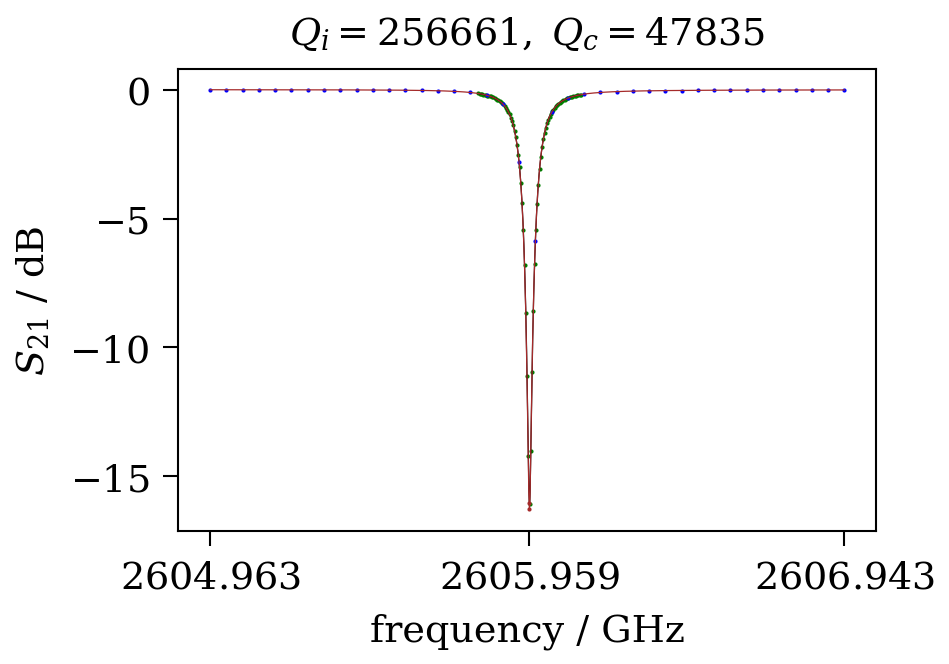

In [25]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True,
                               sweep_mean_settings={'color': 'green'}, model_settings={'color': 'black'})
plot_basic.resonator_amplitude(swp.resonator, ax, normalize=True)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

In [53]:
sss_valon.resonator.Q_i

321006.22045635834

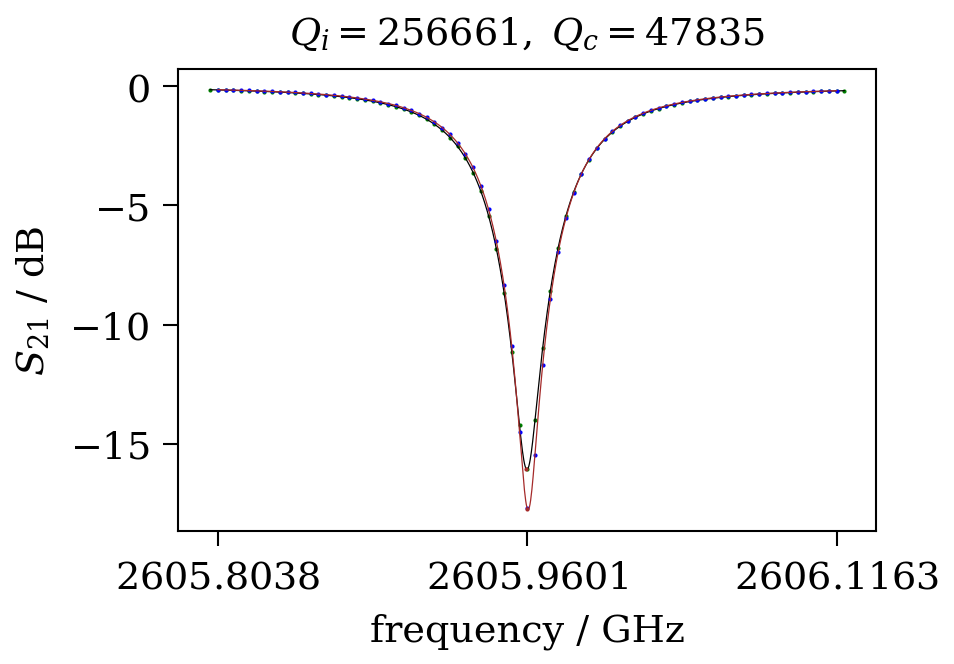

In [52]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / GHz')
ax.set_ylabel('$S_{21}$ / dB')
plot_basic.resonator_amplitude(sss.resonator, ax, normalize=True,
                               sweep_mean_settings={'color': 'green'}, model_settings={'color': 'black'})
plot_basic.resonator_amplitude(sss_valon.resonator, ax, normalize=True)
ax.set_title(r'$Q_i = {:.0f}, \; Q_c = {:.0f}$'.format(sss.resonator.Q_i, sss.resonator.Q_e_real))

# Complex plane

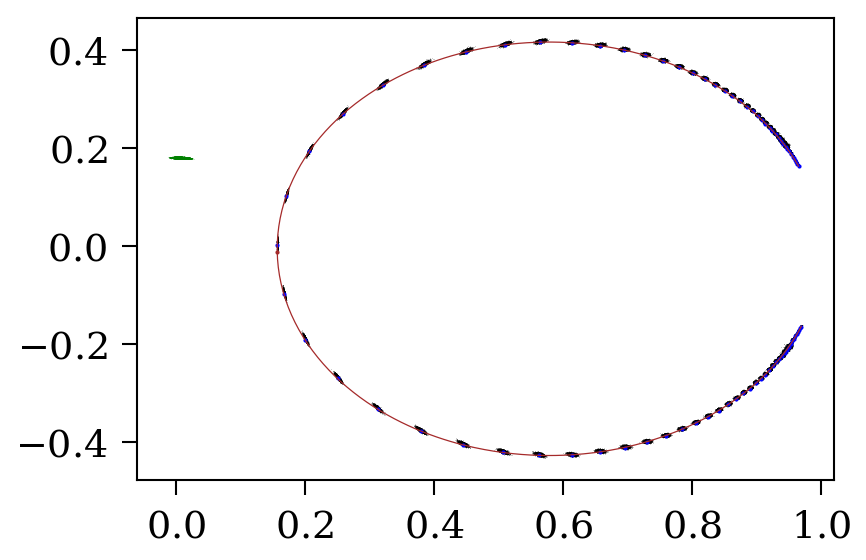

In [51]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss, ax)

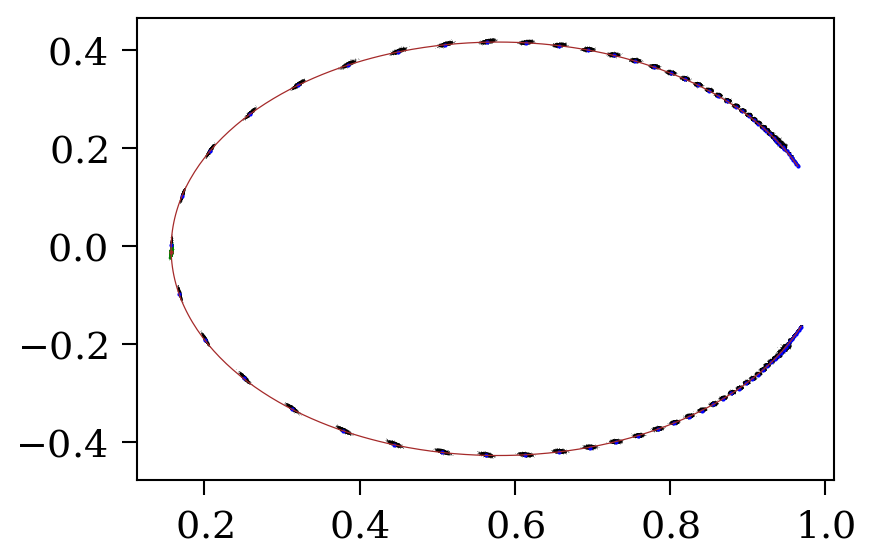

In [27]:
fig, ax = plt.subplots()
plot_basic.sss_complex_plane(sss_rs, ax)

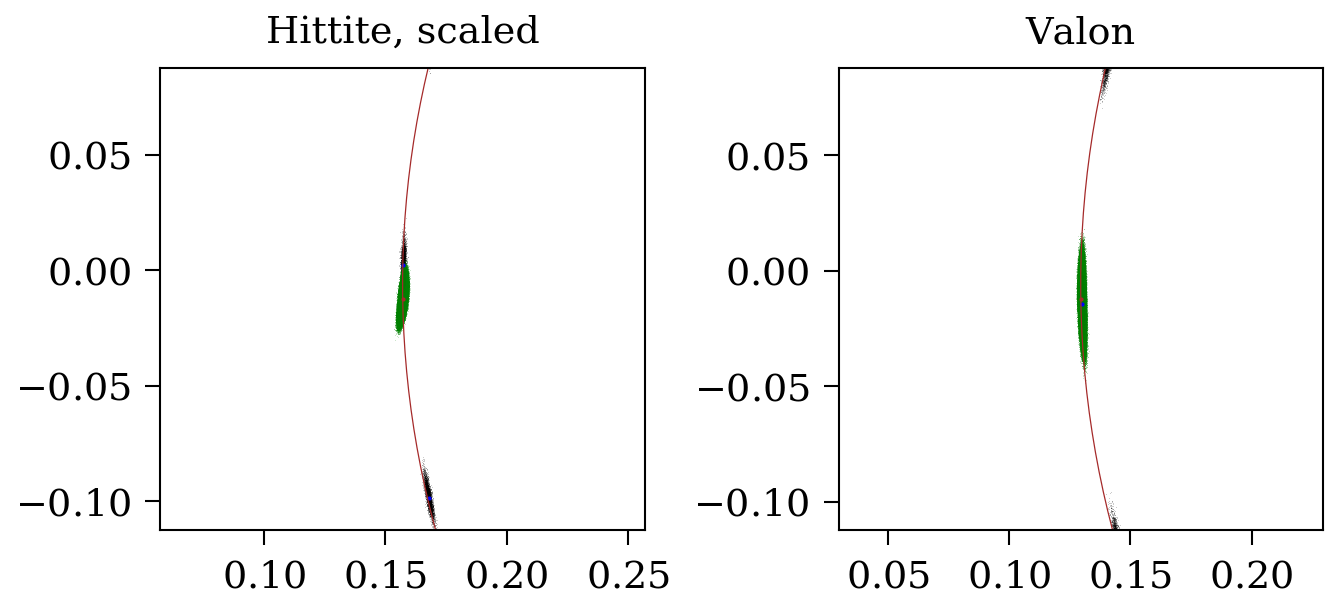

In [50]:
fig, (rs_ax, valon_ax) = plt.subplots(1, 2, figsize=(5, 2), gridspec_kw={'wspace': 0.4})
rs_ax.set_title('Hittite, scaled')
valon_ax.set_title('Valon')
plot_basic.sss_complex_plane(sss_rs, rs_ax, zoom=True)
plot_basic.sss_complex_plane(sss_valon, valon_ax, zoom=True)

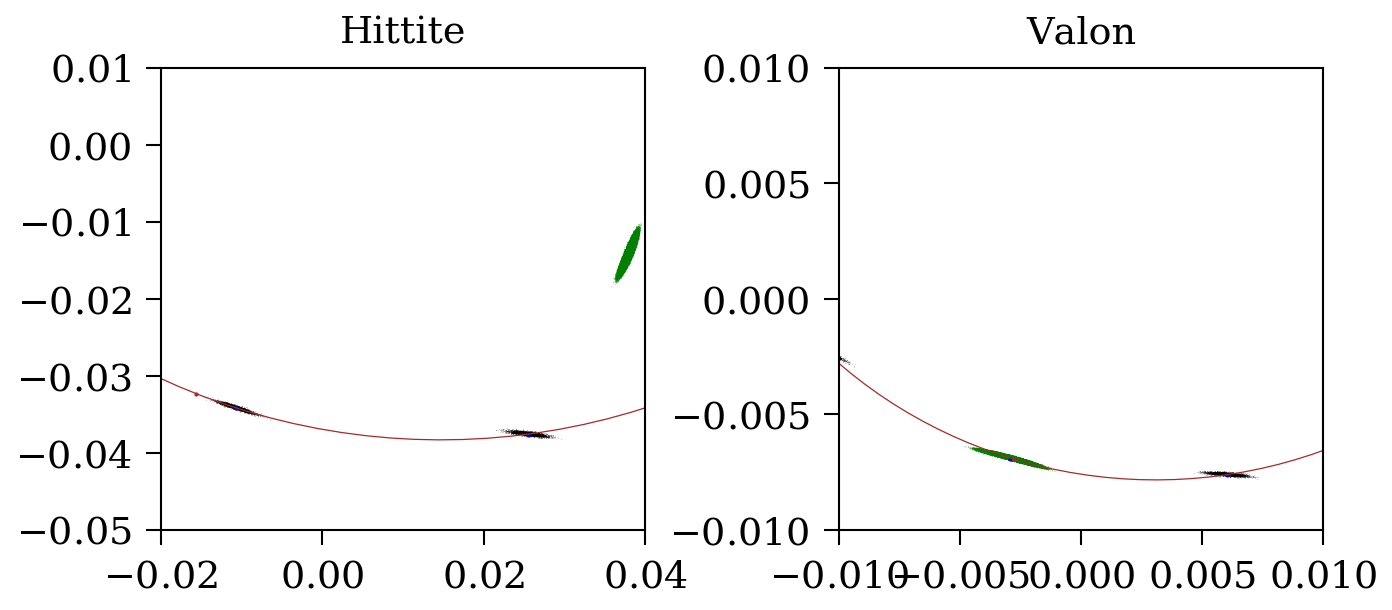

In [49]:
fig, (hittite_ax, valon_ax) = plt.subplots(1, 2, figsize=(5, 2), gridspec_kw={'wspace': 0.4})
hittite_ax.set_title('Hittite')
valon_ax.set_title('Valon')
plot_basic.sss_complex_plane(sss, hittite_ax, normalize=False, zoom=True)
plot_basic.sss_complex_plane(sss_valon, valon_ax, normalize=False, zoom=True)

hittite_ax.set_xlim(-0.02, 0.04)
hittite_ax.set_ylim(-0.05, 0.01);
valon_ax.set_xlim(-0.01, 0.01)
valon_ax.set_ylim(-0.01, 0.01);

/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/iqnoise.py:227: ComplexWarning: Casting complex values to real discards the imaginary part
  Pxx[:, i] = np.conjugate(fx[:numFreqs]) * fx[:numFreqs]
/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/iqnoise.py:228: ComplexWarning: Casting complex values to real discards the imaginary part
  Pyy[:, i] = np.conjugate(fy[:numFreqs]) * fy[:numFreqs]
/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/iqnoise.py:136: ComplexWarning: Casting complex values to real discards the imaginary part
  S[0, k] = ss[0, 0]
/home/flanigan/readout/kid_readout/kid_readout/analysis/timeseries/iqnoise.py:137: ComplexWarning: Casting complex values to real discards the imaginary part
  S[1, k] = ss[1, 1]


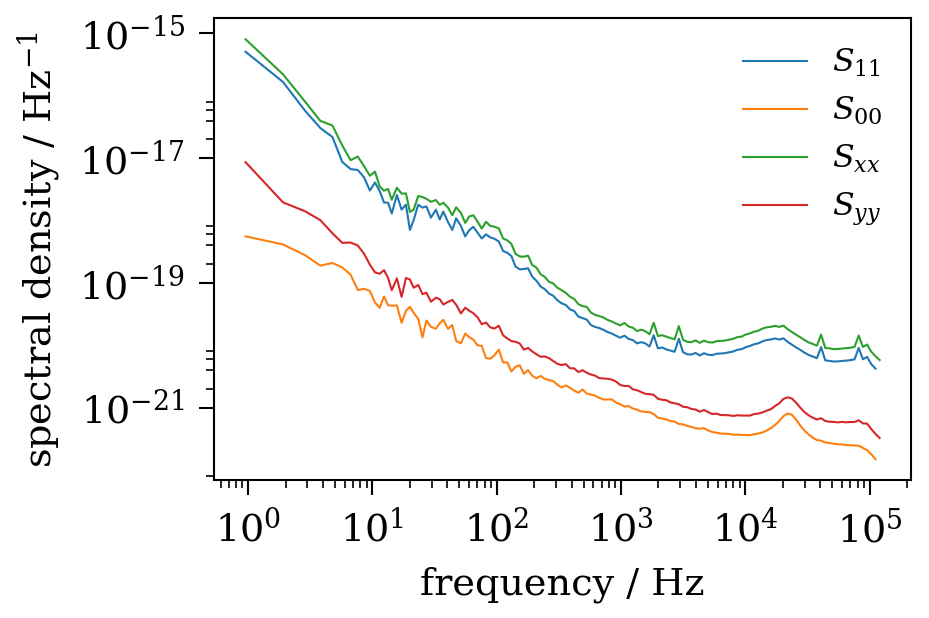

In [22]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.loglog(sss.pca_S_frequency, sss.pca_S_11, label='$S_{11}$')
ax.loglog(sss.pca_S_frequency, sss.pca_S_00, label='$S_{00}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_xx, label='$S_{xx}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_yy, label='$S_{yy}$')
ax.legend(fontsize='x-small')

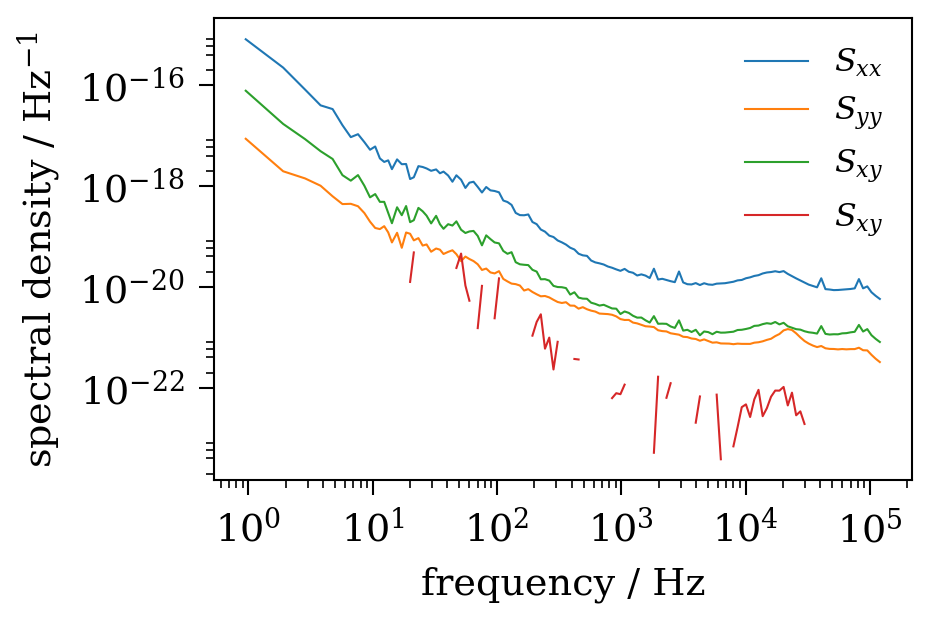

In [35]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_xx, label='$S_{xx}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_yy, label='$S_{yy}$')
ax.loglog(sss_rs.S_frequency, np.real(sss_rs.S_xy), label=r'$\Re S_{xy}$')
ax.loglog(sss_rs.S_frequency, np.imag(sss_rs.S_xy), label=r'$\Im S_{xy}$')
ax.legend(fontsize='x-small')

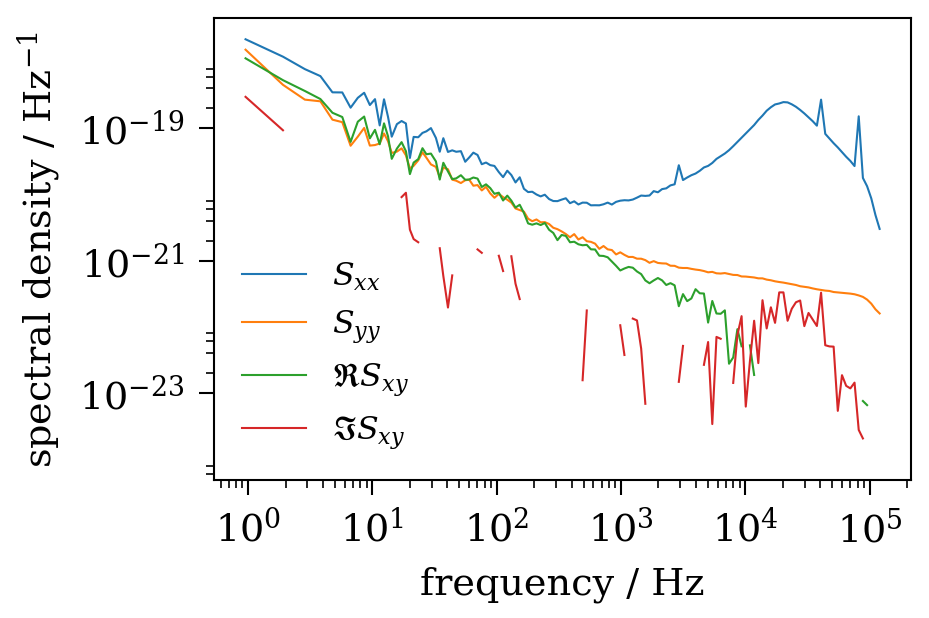

In [36]:
fig, ax = plt.subplots()
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.loglog(sss_valon.S_frequency, sss_valon.S_xx, label='$S_{xx}$')
ax.loglog(sss_valon.S_frequency, sss_valon.S_yy, label='$S_{yy}$')
ax.loglog(sss_valon.S_frequency, np.real(sss_valon.S_xy), label=r'$\Re S_{xy}$')
ax.loglog(sss_valon.S_frequency, np.imag(sss_valon.S_xy), label=r'$\Im S_{xy}$')
ax.legend(fontsize='x-small')

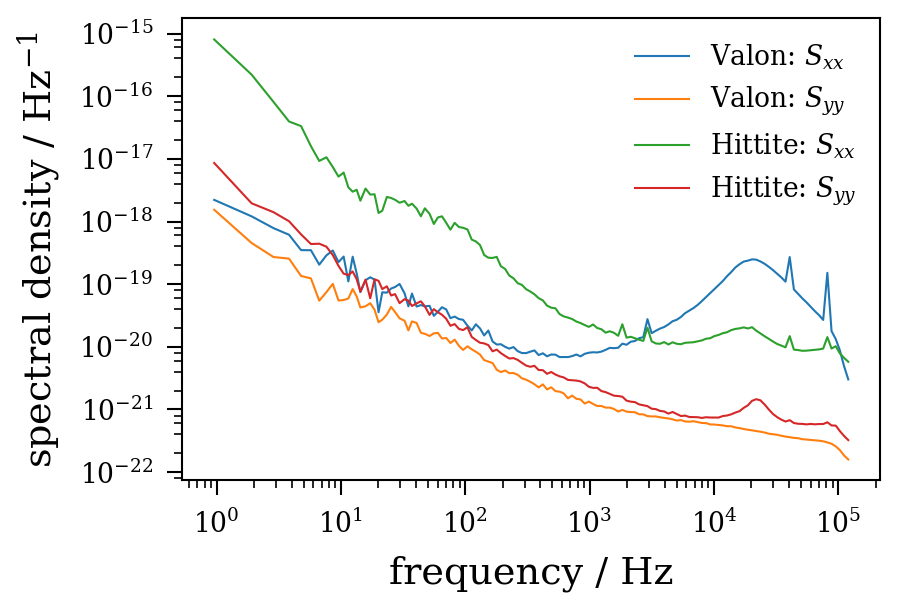

In [23]:
fig, ax = plt.subplots(figsize=(3, 2))
ax.set_xlabel('frequency / Hz')
ax.set_ylabel('spectral density / Hz$^{-1}$')
ax.tick_params(labelsize='xx-small')
ax.loglog(sss_valon.S_frequency, sss_valon.S_xx, label='Valon: $S_{xx}$')
ax.loglog(sss_valon.S_frequency, sss_valon.S_yy, label='Valon: $S_{yy}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_xx, label='Hittite: $S_{xx}$')
ax.loglog(sss_rs.S_frequency, sss_rs.S_yy, label='Hittite: $S_{yy}$')
ax.legend(fontsize='xx-small')

fig.savefig('/home/flanigan/temp/valon_versus_hittite.pdf')

In [37]:
2e9/50e3

40000.0